In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:09<00:00, 117MB/s]
100% 1.06G/1.06G [00:09<00:00, 123MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [11]:
#Genertors

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# Normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
# Create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid', activation = 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                        

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 64s 82ms/step - loss: 0.5986 - accuracy: 0.6776 - val_loss: 0.5768 - val_accuracy: 0.7008
Epoch 2/10
625/625 [==============================] - 51s 81ms/step - loss: 0.4681 - accuracy: 0.7773 - val_loss: 0.4782 - val_accuracy: 0.7758
Epoch 3/10
625/625 [==============================] - 52s 83ms/step - loss: 0.3450 - accuracy: 0.8478 - val_loss: 0.6402 - val_accuracy: 0.7408
Epoch 4/10
625/625 [==============================] - 49s 77ms/step - loss: 0.2137 - accuracy: 0.9131 - val_loss: 1.1774 - val_accuracy: 0.7152
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1235 - accuracy: 0.9534 - val_loss: 0.9949 - val_accuracy: 0.7566
Epoch 6/10
625/625 [==============================] - 50s 80ms/step - loss: 0.0913 - accuracy: 0.9675 - val_loss: 0.9948 - val_accuracy: 0.7702
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0658 - accuracy: 0.9772 - val_loss: 0.9023 - val_accuracy:

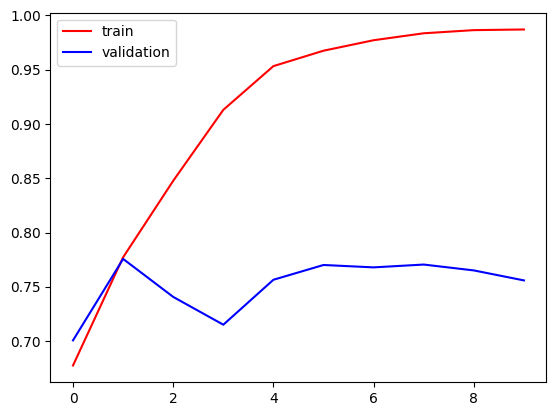

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

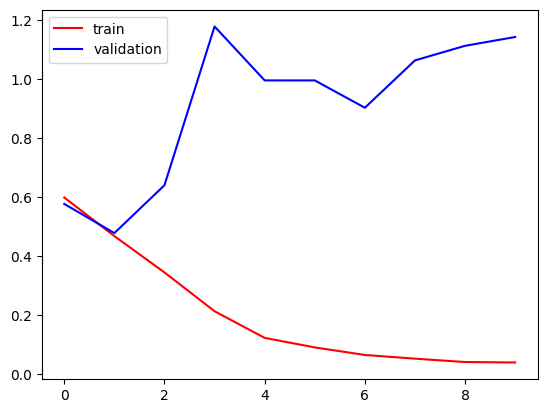

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting

# add more data
# Data augmentation
#l1/l2 regularizer
# dropout --
# batch Norm --
# Reduce complexity

In [20]:
import cv2

In [55]:
test_img = cv2.imread('/content/dog.jpg')

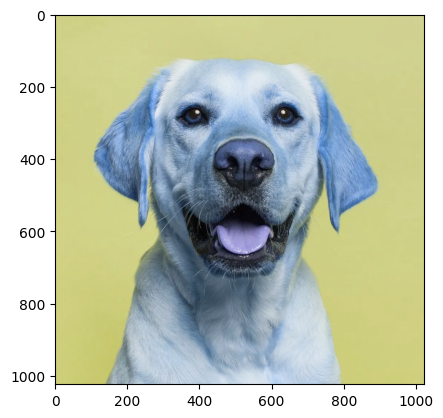

In [56]:
plt.imshow(test_img)

In [57]:
test_image.shape

(256, 256, 3)

In [58]:
test_image = cv2.resize(test_img,(256,256))

In [59]:
test_input = test_image.reshape((1,256,256,3))

In [60]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [ ]:
import cv2

In [50]:
test_img = cv2.imread('/content/cat.jpg')

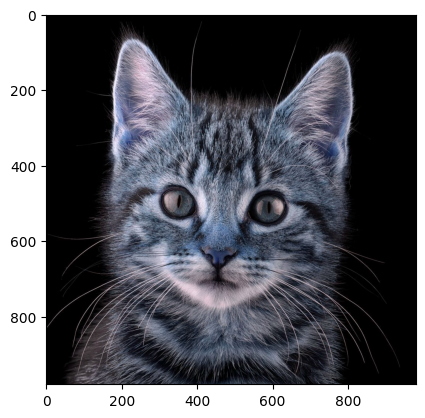

In [51]:
plt.imshow(test_img)

In [61]:
test_image.shape

(256, 256, 3)

In [53]:
test_input = test_image.reshape((1,256,256,3))

In [54]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)